<a href="https://colab.research.google.com/github/shintafiaa/1SAT/blob/main/2_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

path = '/content/gdrive/MyDrive/TugasAkhirS1Shinta/EnsembleDRL/data/JIIDataset_2009_2021.csv'
JIIStocksDataset = pd.read_csv(path)
JIIStocksDataset

,Unnamed: 0,datadate,tic,adjcp,open,high,low,volume
0,0,20090105,ADRO,289.563416,520.0,520.0,485.0,3.0
1,1,20090106,ADRO,283.994965,520.0,540.0,510.0,11781500.0
2,2,20090107,ADRO,289.563416,520.0,550.0,510.0,27035500.0
3,3,20090108,ADRO,278.426392,500.0,510.0,500.0,2130000.0
4,4,20090109,ADRO,283.994965,510.0,520.0,510.0,1698000.0
...,...,...,...,...,...,...,...,...
88447,88447,20211224,WIKA,1075.000000,1060.0,1090.0,1055.0,13753500.0
88448,88448,20211227,WIKA,1125.000000,1080.0,1140.0,1080.0,20641600.0
88449,88449,20211228,WIKA,1130.000000,1135.0,1150.0,1110.0,22979500.0
88450,88450,20211229,WIKA,1130.000000,1130.0,1135.0,1105.0,8582200.0


In [ ]:
JIIStocksDataset.drop('Unnamed: 0', inplace=True, axis=1)
print(JIIStocksDataset)

       datadate   tic        adjcp    open    high     low      volume
0      20090105  ADRO   289.563416   520.0   520.0   485.0         3.0
1      20090106  ADRO   283.994965   520.0   540.0   510.0  11781500.0
2      20090107  ADRO   289.563416   520.0   550.0   510.0  27035500.0
3      20090108  ADRO   278.426392   500.0   510.0   500.0   2130000.0
4      20090109  ADRO   283.994965   510.0   520.0   510.0   1698000.0
...         ...   ...          ...     ...     ...     ...         ...
88447  20211224  WIKA  1075.000000  1060.0  1090.0  1055.0  13753500.0
88448  20211227  WIKA  1125.000000  1080.0  1140.0  1080.0  20641600.0
88449  20211228  WIKA  1130.000000  1135.0  1150.0  1110.0  22979500.0
88450  20211229  WIKA  1130.000000  1130.0  1135.0  1105.0   8582200.0
88451  20211230  WIKA  1105.000000  1130.0  1140.0  1105.0  10166400.0

[88452 rows x 7 columns]


In [ ]:
JIIStocksDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88452 entries, 0 to 88451
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datadate  88452 non-null  int64  
 1   tic       88452 non-null  object 
 2   adjcp     88450 non-null  float64
 3   open      88450 non-null  float64
 4   high      88450 non-null  float64
 5   low       88450 non-null  float64
 6   volume    88450 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.7+ MB


In [ ]:
#displaying nan row
JIIStocksDataset[JIIStocksDataset['adjcp'].isnull()]

,datadate,tic,adjcp,open,high,low,volume
15208,20150501,EMTK,NaN,NaN,NaN,NaN,NaN
41665,20201209,INTP,NaN,NaN,NaN,NaN,NaN


In [ ]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

# take numerical features
numerical_features = ['adjcp',	'open',	'high',	'low',	'volume']

# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
JIIStocksDataset_After_imputation = imputer.fit_transform(JIIStocksDataset[numerical_features])

In [ ]:
# print dataset after performing the operation
# Note: After transforming the data becomes a numpy array
print("\n\nAfter performing imputation\n",JIIStocksDataset_After_imputation)



After performing imputation
 [[2.89563416e+02 5.20000000e+02 5.20000000e+02 4.85000000e+02
  3.00000000e+00]
 [2.83994965e+02 5.20000000e+02 5.40000000e+02 5.10000000e+02
  1.17815000e+07]
 [2.89563416e+02 5.20000000e+02 5.50000000e+02 5.10000000e+02
  2.70355000e+07]
 ...
 [1.13000000e+03 1.13500000e+03 1.15000000e+03 1.11000000e+03
  2.29795000e+07]
 [1.13000000e+03 1.13000000e+03 1.13500000e+03 1.10500000e+03
  8.58220000e+06]
 [1.10500000e+03 1.13000000e+03 1.14000000e+03 1.10500000e+03
  1.01664000e+07]]


In [ ]:
#import numpy array to dataframe

import numpy as np

JIIStocksDataframe_After_imputation = pd.DataFrame(JIIStocksDataset_After_imputation, columns = ['adjcp',	'open',	'high',	'low',	'volume'])
print(JIIStocksDataframe_After_imputation)

             adjcp    open    high     low      volume
0       289.563416   520.0   520.0   485.0         3.0
1       283.994965   520.0   540.0   510.0  11781500.0
2       289.563416   520.0   550.0   510.0  27035500.0
3       278.426392   500.0   510.0   500.0   2130000.0
4       283.994965   510.0   520.0   510.0   1698000.0
...            ...     ...     ...     ...         ...
88447  1075.000000  1060.0  1090.0  1055.0  13753500.0
88448  1125.000000  1080.0  1140.0  1080.0  20641600.0
88449  1130.000000  1135.0  1150.0  1110.0  22979500.0
88450  1130.000000  1130.0  1135.0  1105.0   8582200.0
88451  1105.000000  1130.0  1140.0  1105.0  10166400.0

[88452 rows x 5 columns]


In [ ]:
#drop some column of JIIStockDataset 
JIIStocksDataset = JIIStocksDataset.drop(JIIStocksDataset.columns[[2, 3, 4, 5, 6]], axis=1) 

JIIStocksDataframe = pd.concat([JIIStocksDataset, JIIStocksDataframe_After_imputation], axis=1)
JIIStocksDataframe

,datadate,tic,adjcp,open,high,low,volume
0,20090105,ADRO,289.563416,520.0,520.0,485.0,3.0
1,20090106,ADRO,283.994965,520.0,540.0,510.0,11781500.0
2,20090107,ADRO,289.563416,520.0,550.0,510.0,27035500.0
3,20090108,ADRO,278.426392,500.0,510.0,500.0,2130000.0
4,20090109,ADRO,283.994965,510.0,520.0,510.0,1698000.0
...,...,...,...,...,...,...,...
88447,20211224,WIKA,1075.000000,1060.0,1090.0,1055.0,13753500.0
88448,20211227,WIKA,1125.000000,1080.0,1140.0,1080.0,20641600.0
88449,20211228,WIKA,1130.000000,1135.0,1150.0,1110.0,22979500.0
88450,20211229,WIKA,1130.000000,1130.0,1135.0,1105.0,8582200.0


In [ ]:
JIIStocksDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88452 entries, 0 to 88451
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datadate  88452 non-null  int64  
 1   tic       88452 non-null  object 
 2   adjcp     88452 non-null  float64
 3   open      88452 non-null  float64
 4   high      88452 non-null  float64
 5   low       88452 non-null  float64
 6   volume    88452 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.7+ MB


In [ ]:
import seaborn as sns

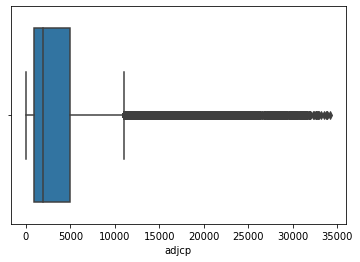

In [ ]:
sns.boxplot(x=JIIStocksDataframe['adjcp'])

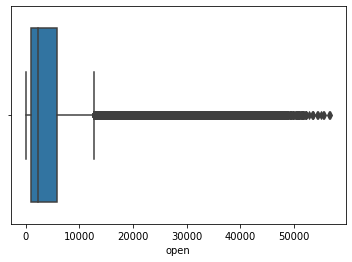

In [ ]:
sns.boxplot(x=JIIStocksDataframe['open'])

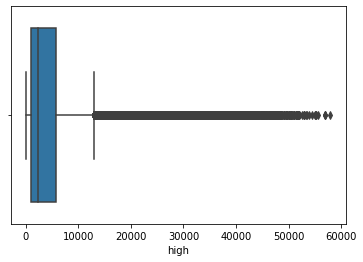

In [ ]:
sns.boxplot(x=JIIStocksDataframe['high'])

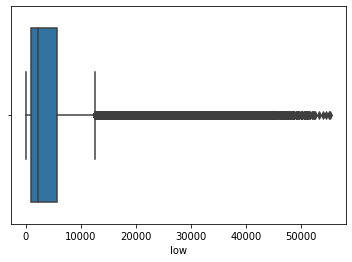

In [ ]:
sns.boxplot(x=JIIStocksDataframe['low'])

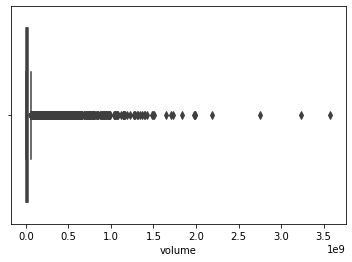

In [ ]:
sns.boxplot(x=JIIStocksDataframe['volume'])

In [ ]:
volumeUnder1000 = (JIIStocksDataframe.volume < 1000).sum()

print("Total of volume value under 1000: ", volumeUnder1000)

Total of volume value under 1000:  4789


In [ ]:
#Drop volume value under 1000
JIIStocksDataframe = JIIStocksDataframe.loc[(JIIStocksDataframe[['volume']]>=1000).all(axis=1)]

#check the data size to make sure the rows have been dropped
JIIStocksDataframe.shape

(83663, 7)

In [ ]:
import random
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

In [ ]:
numerical_features = ['adjcp', 'open', 'high', 'low', 'volume']

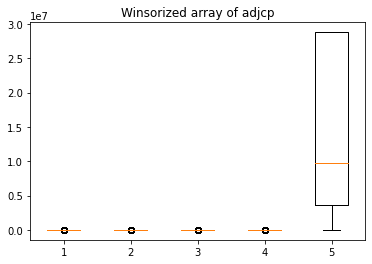

In [ ]:
WinsorizedArray = winsorize(JIIStocksDataframe[numerical_features],(0.05,0.05))
  
plt.boxplot(WinsorizedArray)
plt.title('Winsorized array of adjcp')
plt.show()

In [ ]:
PreprocessedJIIStocksDataframe = pd.DataFrame(WinsorizedArray, columns = ['adjcp',	'open',	'high',	'low',	'volume'])

In [ ]:
#Standardization with StandardScaler
from sklearn.preprocessing import StandardScaler

numerical_features = ['adjcp', 'open', 'high', 'low', 'volume']
scaler = StandardScaler()
scaler.fit(PreprocessedJIIStocksDataframe[numerical_features])
PreprocessedJIIStocksDataframe[numerical_features] = scaler.transform(JIIStocksDataframe.loc[:, numerical_features])
PreprocessedJIIStocksDataframe[numerical_features].head()

,adjcp,open,high,low,volume
0,-0.776838,-0.649953,-0.648923,-0.649429,-0.150380
1,-0.775656,-0.649953,-0.647508,-0.649429,1.249232
2,-0.778021,-0.652822,-0.653168,-0.650885,-1.035941
3,-0.776838,-0.651387,-0.651753,-0.649429,-1.075579
4,-0.756735,-0.627004,-0.619210,-0.627589,9.669200


In [ ]:
# Standardization changes the mean to 0 and the standard deviation to 1
PreprocessedJIIStocksDataframe[numerical_features].describe().round(4)

,adjcp,open,high,low,volume
count,83663.0000,83663.0000,83663.0000,83663.0000,83663.0000
mean,-0.0024,-0.0014,-0.0013,-0.0014,1.4645
std,1.0019,1.0010,1.0009,1.0010,6.1094
min,-0.8347,-0.7228,-0.7236,-0.7220,-1.2313
25%,-0.6390,-0.5746,-0.5744,-0.5744,-0.9035
50%,-0.4130,-0.3946,-0.3942,-0.3961,-0.3364
75%,0.2487,0.1244,0.1236,0.1237,1.4110
max,6.4307,7.4225,7.4742,7.3282,327.1353


In [ ]:
JIIStocksDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83663 entries, 1 to 88451
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datadate  83663 non-null  int64  
 1   tic       83663 non-null  object 
 2   adjcp     83663 non-null  float64
 3   open      83663 non-null  float64
 4   high      83663 non-null  float64
 5   low       83663 non-null  float64
 6   volume    83663 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.1+ MB


In [ ]:
PreprocessedJIIStocksDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83663 entries, 0 to 83662
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   adjcp   83663 non-null  float64
 1   open    83663 non-null  float64
 2   high    83663 non-null  float64
 3   low     83663 non-null  float64
 4   volume  83663 non-null  float64
dtypes: float64(5)
memory usage: 3.2 MB


In [ ]:
JIIStocksDataset = JIIStocksDataset.to_numpy()

In [ ]:
JIIStocksDataset

array([[20090105, 'ADRO'],
       [20090106, 'ADRO'],
       [20090107, 'ADRO'],
       ...,
       [20211228, 'WIKA'],
       [20211229, 'WIKA'],
       [20211230, 'WIKA']], dtype=object)

In [ ]:
df = pd.DataFrame(JIIStocksDataset, columns = ['datadate','tic'])

In [ ]:
PreprocessedJIIStocksDataframe = pd.concat([df, PreprocessedJIIStocksDataframe], axis=1)
PreprocessedJIIStocksDataframe

,datadate,tic,adjcp,open,high,low,volume
0,20090105,ADRO,-0.776838,-0.649953,-0.648923,-0.649429,-0.150380
1,20090106,ADRO,-0.775656,-0.649953,-0.647508,-0.649429,1.249232
2,20090107,ADRO,-0.778021,-0.652822,-0.653168,-0.650885,-1.035941
3,20090108,ADRO,-0.776838,-0.651387,-0.651753,-0.649429,-1.075579
4,20090109,ADRO,-0.756735,-0.627004,-0.619210,-0.627589,9.669200
...,...,...,...,...,...,...,...
88447,20211224,WIKA,NaN,NaN,NaN,NaN,NaN
88448,20211227,WIKA,NaN,NaN,NaN,NaN,NaN
88449,20211228,WIKA,NaN,NaN,NaN,NaN,NaN
88450,20211229,WIKA,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save dataframe as csv
dataset = PreprocessedJIIStocksDataframe.to_csv("/content/gdrive/MyDrive/TugasAkhirS1Shinta/FinalDataset/PreprocessedJIIDataset.csv")